## Lanscape EDA
- altitude
- fuel
- wind

### Imports

In [1]:
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import rasterio
from rasterio.transform import from_origin, Affine
import pandas as pd
import geopandas as gpd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
LCP_PATH = f'../examples/aullene/landscape.nc'
landscape = xr.open_dataset(LCP_PATH)
landscape

<xarray.Dataset>
Dimensions:     (wind_dimensions: 2, wind_directions: 8, wind_rows: 200,
                 wind_columns: 200, ft: 1, fz: 1, fy: 682, fx: 511, nt: 1,
                 nz: 1, ny: 682, nx: 511)
Dimensions without coordinates: wind_dimensions, wind_directions, wind_rows,
                                wind_columns, ft, fz, fy, fx, nt, nz, ny, nx
Data variables:
    parameters  |S1 ...
    domain      |S1 ...
    wind        (wind_dimensions, wind_directions, wind_rows, wind_columns) float32 ...
    fuel        (ft, fz, fy, fx) int32 ...
    altitude    (nt, nz, ny, nx) float64 ...
Attributes:
    projection:  32632

## Altitude

In [3]:
altitude = landscape['altitude'][0][0]

json = {
    "min_value":np.min(np.array(altitude)),
    "max_value":np.max(np.array(altitude)),
    "mean":np.mean(np.array(altitude)),
}

print(f'Altitude\n')
pd.DataFrame([json])

Altitude



,min_value,max_value,mean
0,0.0,2100.0,510.378067


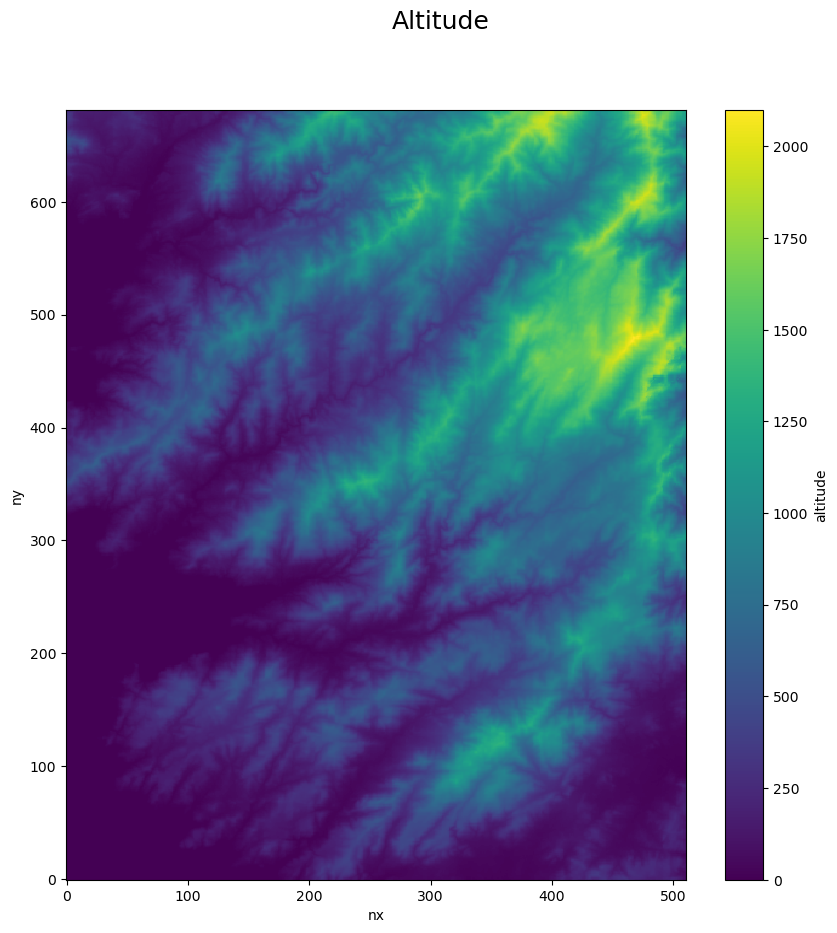

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle("Altitude", fontsize=18)

altitude.plot(ax=ax)
plt.show()

## Fuel

In [5]:
fuel = landscape['fuel'][0][0]
print(fuel.shape)
print('Distinct values', np.unique(fuel))

(682, 511)
Distinct values [112 121 124 131 142 211 221 222 231 242 243 311 312 313 321 322 323 324
 331 332 333 411 512 521 523]


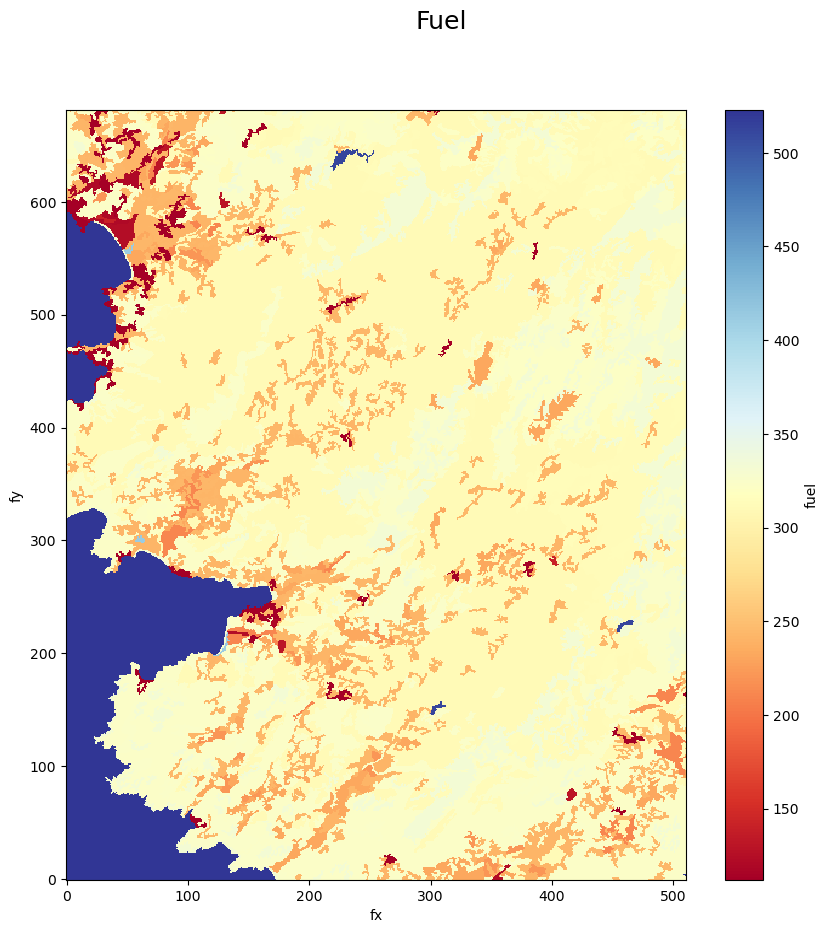

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle("Fuel", fontsize=18)

fuel.plot(ax=ax, cmap='RdYlBu')
plt.show()

### WIND SPEED

In [7]:
data = []
for d in range(8):
    ws = np.array(((landscape['wind'][0][d])**2 + (landscape['wind'][1][d])**2)**0.5)
    
    row = {
        "index":d,
        "mean" : np.mean(ws),
        "min_value" : np.min(ws),
        "max_value" : np.max(ws),
    }
    
    data.append(row)

pd.DataFrame(data)

,index,mean,min_value,max_value
0,0,10.349002,4.224354,25.330879
1,1,9.837409,4.540955,20.514231
2,2,9.926701,1.984437,19.630383
3,3,10.424786,3.808321,23.307413
4,4,10.349002,4.224354,25.330873
5,5,9.837409,4.540957,20.514227
6,6,9.926701,1.984500,19.630381
7,7,10.424784,3.808808,23.307497


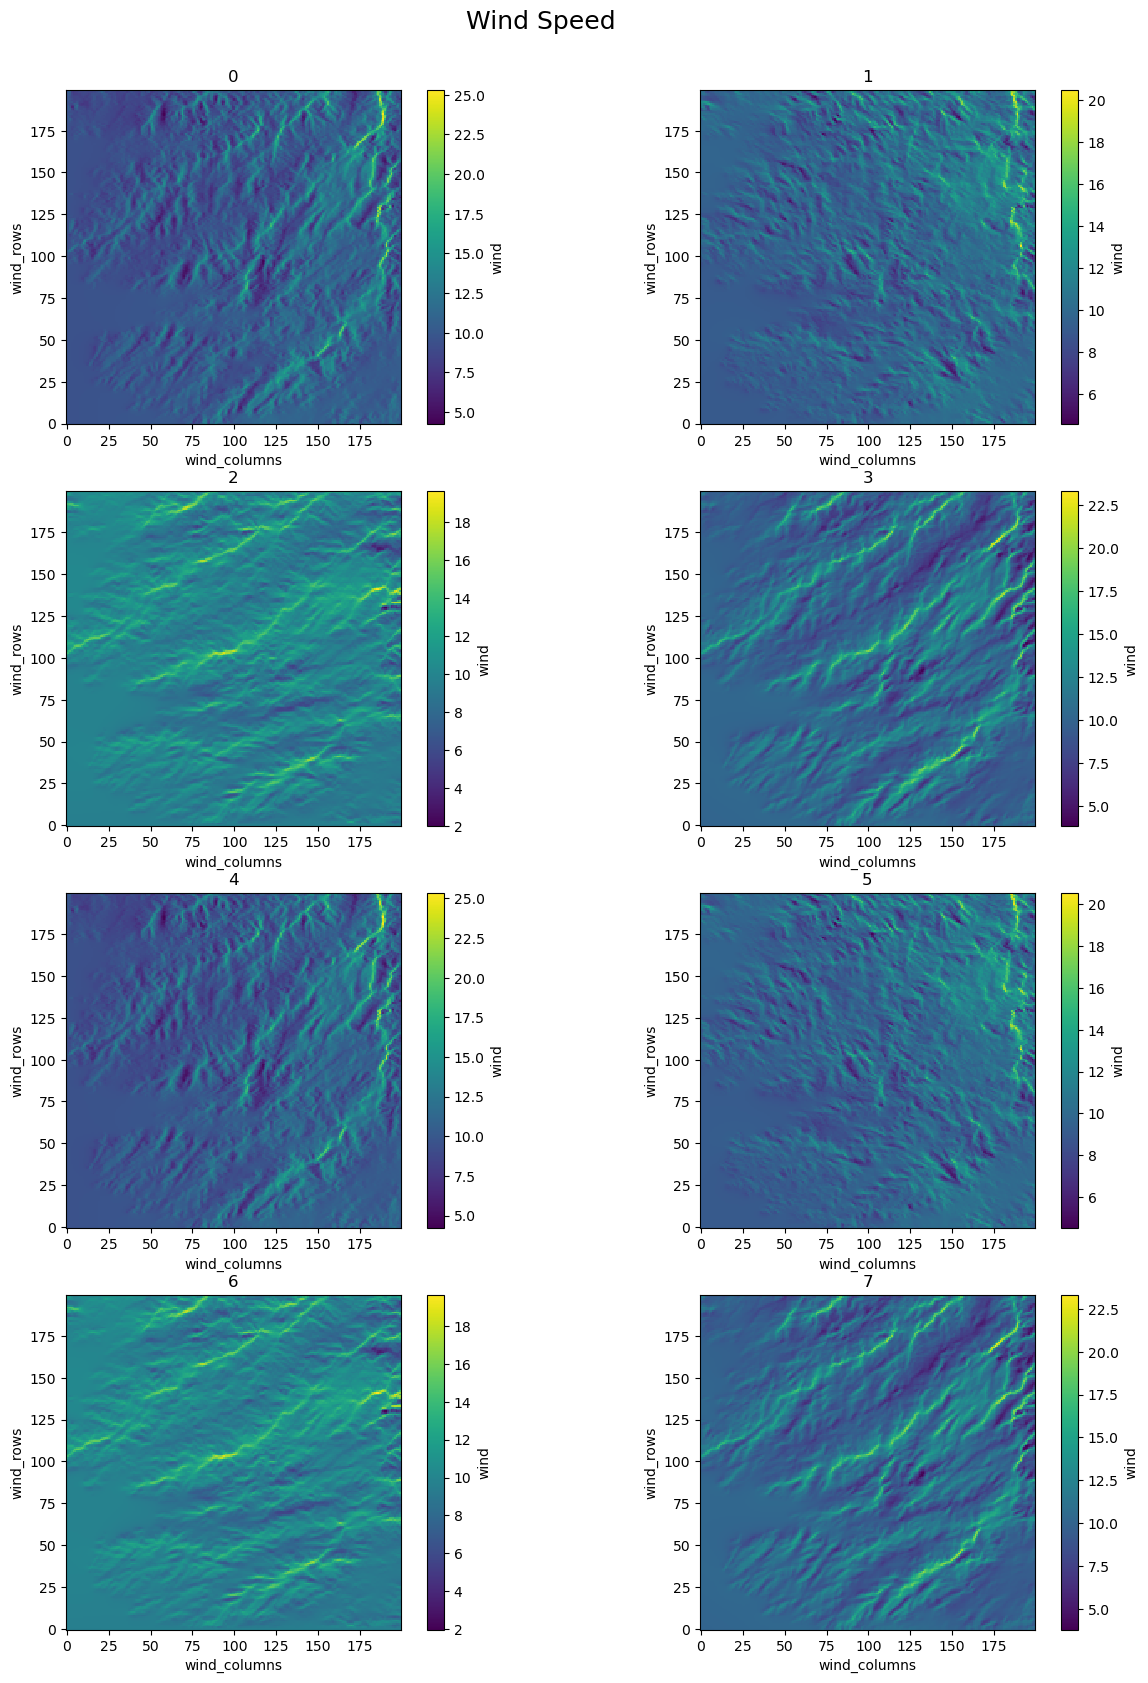

In [8]:
# define subplot grid
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle("Wind Speed", fontsize=18, y=0.92)


# loop through tickers and axes
for direction, ax in zip(range(8), axs.ravel()):
    # filter df for ticker and plot on specified axes
    ws = ((landscape['wind'][0][direction])**2 + (landscape['wind'][1][direction])**2)**0.5
    ws.plot(ax=ax)

    # chart formatting
    ax.set_aspect("equal")
    ax.set_title(f'{direction}')

plt.show()

# WIND DIRECTION

/home/ludovic/anaconda3/envs/raster/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ludovic/anaconda3/envs/raster/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ludovic/anaconda3/envs/raster/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

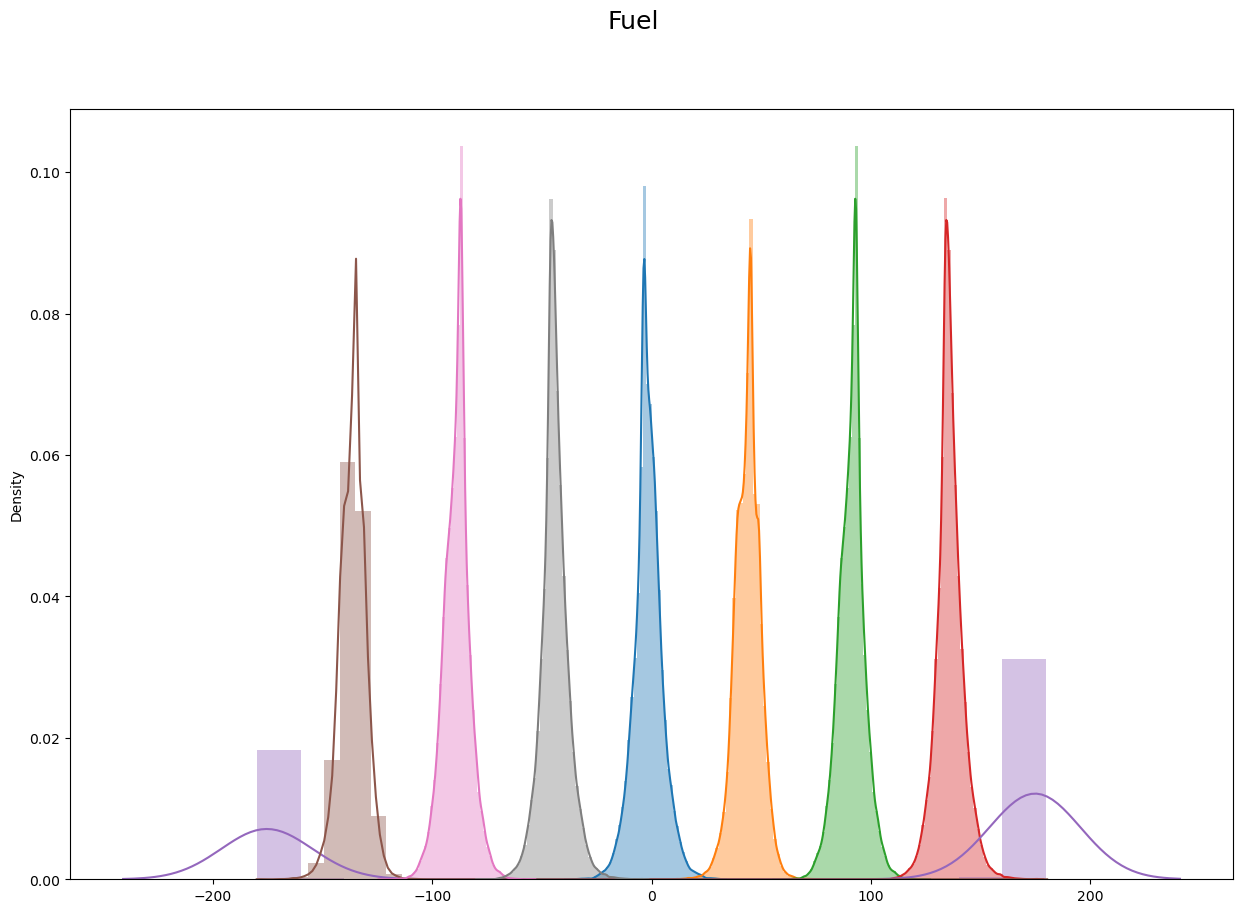

In [9]:
data = []

fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("Fuel", fontsize=18)


for direction in range(8):
    u = landscape['wind'][0][direction]
    v = landscape['wind'][1][direction]
    
    #w_direction = np.array(np.mod(np.arctan2(v,u)*(180/np.pi) + 180, 360))
    w_direction = np.array(np.arctan2(v,u)*(180/np.pi))
    
    row = {
        "mean" : np.mean(w_direction),
        "std" : np.mean(np.std(w_direction)),
        "min_value" : np.min(w_direction),
        "max_value" : np.max(w_direction),
    }
    
    data.append(row)
        
    sns.distplot(w_direction, ax=ax);

plt.show()    

In [10]:
pd.DataFrame(data)

,mean,std,min_value,max_value
0,-1.596208,6.511227,-37.025547,31.569668
1,43.822956,5.884439,-1.844021,75.666267
2,91.288780,6.052254,57.710823,124.805641
3,135.938278,6.189634,102.278999,176.371353
4,45.239792,169.003235,-179.999756,179.999832
5,-136.168045,6.086422,-177.790558,178.155991
6,-88.711220,6.052255,-122.289268,-55.194588
7,-44.061729,6.189640,-77.723099,-3.637564
